<a href="https://colab.research.google.com/github/tumuluripradeep/AIML_PA3_M17_1/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import time
import math
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Import all of the methods that we will need.
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Examine catagorical columns to see if the output class is dependent upon each value type.
obj_col = df.select_dtypes(include='object')
for col in obj_col:
    vals = df[col].unique()
    print()
    print(f"{col}:")
    for val in vals:
        num_true = len(df[(df[col] == val) & (df['y'] == 'yes')])
        num_false = len(df[(df[col] == val) & (df['y'] == 'no')])
        num_total = num_true + num_false
        pct_true = int(num_true / num_total *100)
        pct_false = int(num_false / num_total *100)
        print(f"{col} == {val}: {pct_true}% True, {pct_false}% False" )


job:
job == housemaid: 10% True, 90% False
job == services: 8% True, 91% False
job == admin.: 12% True, 87% False
job == blue-collar: 6% True, 93% False
job == technician: 10% True, 89% False
job == retired: 25% True, 74% False
job == management: 11% True, 88% False
job == unemployed: 14% True, 85% False
job == self-employed: 10% True, 89% False
job == unknown: 11% True, 88% False
job == entrepreneur: 8% True, 91% False
job == student: 31% True, 68% False

marital:
marital == married: 10% True, 89% False
marital == single: 14% True, 85% False
marital == divorced: 10% True, 89% False
marital == unknown: 15% True, 85% False

education:
education == basic.4y: 10% True, 89% False
education == high.school: 10% True, 89% False
education == basic.6y: 8% True, 91% False
education == basic.9y: 7% True, 92% False
education == professional.course: 11% True, 88% False
education == unknown: 14% True, 85% False
education == university.degree: 13% True, 86% False
education == illiterate: 22% True, 7

In [6]:
filtered_df = df.drop(['marital', 'housing', 'loan', 'day_of_week'], axis=1)

In [7]:
# According to the paper, age should be equal to or greater than 18.
# Let's consider any ages less than that to be invalid data and drop it.
print(len(filtered_df[filtered_df['age'] < 18]))
filtered_df = filtered_df[filtered_df['age'] >= 18]

# Durations above 2000 appear to be outliers, so let's drop these.
print(len(filtered_df[filtered_df['duration'] > 2000]))
filtered_df = filtered_df[filtered_df['duration'] <= 2000]

# Capaigns above 20 appear to be outliers, so we will drop these.
print(len(filtered_df[filtered_df['campaign'] > 20]))
filtered_df = filtered_df[filtered_df['campaign'] <= 20]

# Let's create a new column for prev_contacted using pdays != 999.
fdf = filtered_df.copy()
print(len(fdf[fdf['pdays'] == 999]))
fdf['prev_contacted'] = True
fdf.loc[fdf['pdays'] != 999, 'prev_contacted'] = False
fdf['pdays'] = fdf['pdays'].replace(999, 0)

# How many previous contacts are == 4, 5, 6, 7?
print(len(fdf[fdf['previous'] == 4]), len(fdf[fdf['previous'] == 5]), len(fdf[fdf['previous'] == 6]), len(fdf[fdf['previous'] == 7]))

5
60
157
39456
70 18 5 1


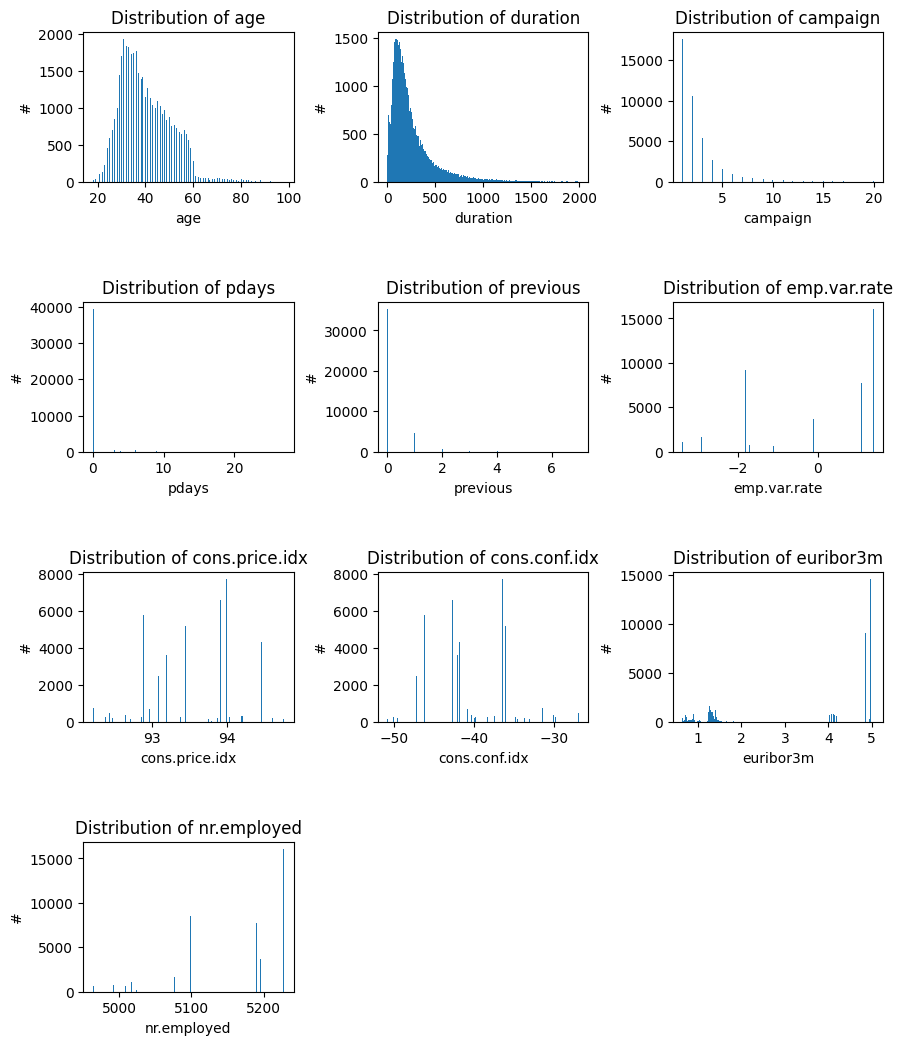

In [10]:
# Create a histogram for each numeric entry.

# # Select the numeric columns and create this # of plots
num_col = fdf.select_dtypes(include='number')
num_plots = len(num_col.columns)
num_x_plots = 3
num_y_plots = math.ceil(float(num_plots) / num_x_plots)

# # Create a figure window with a grid for all of the plots.
fig, axs = plt.subplots(num_y_plots, num_x_plots, figsize=(10, 12)) # 4 rows, 3 columns

x = y = 0
# For each numeric input
for col in num_col:
    # Plot the distribution of this variable.
    axs[y,x].hist(fdf[col], bins=200)
    axs[y,x].set_title(f"Distribution of {col}")
    axs[y,x].set_ylabel('#')
    axs[y,x].set_xlabel(f"{col}")
    # Increment the plot #.
    x+=1
    if x == num_x_plots:
        x = 0
        y+=1

# Hide the unused plots
axs[3,1].set_visible(False)
axs[3,2].set_visible(False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.8)
plt.show();

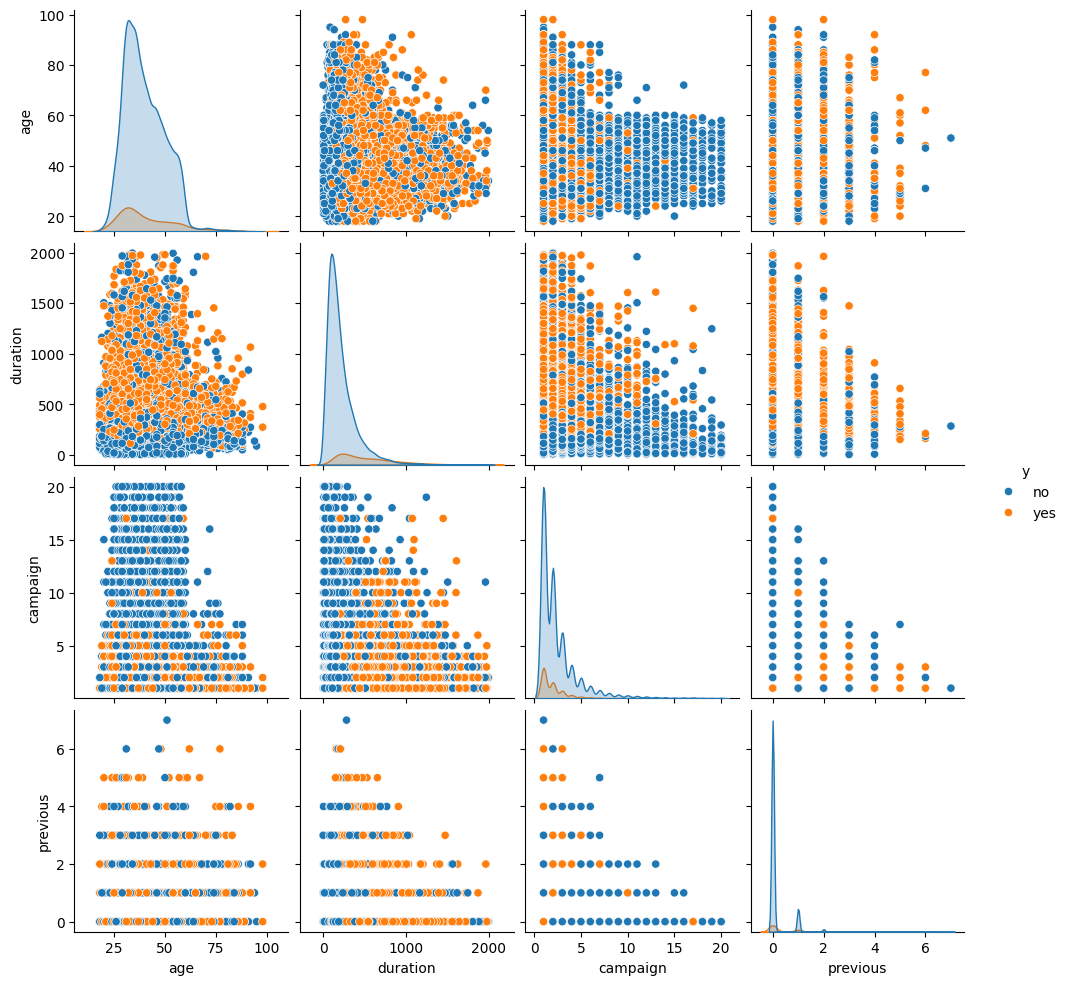

In [11]:
# Only the age, duration, campaign, and previous categories look like they may have a regular distribution.

# Create a pairplot for each of these numeric values.
pair_df = fdf[['age', 'duration', 'campaign', 'previous', 'y']]
pp = sns.pairplot(pair_df, hue="y")

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

After examining the description and data, your goal now is to clearly state the Business Objective of the task. State the objective below.

The business objective is to build a classifier that will determine if an individual will respond to a marketing campaign for making a new term deposit. With this classifier, a bank can collect the required data on each of its customers or potential customers and feed this data to the classifier. The bank will then use these classifications to limit or direct their marketing campaign to a subset of customers that have a high likelyhood (much > 1%) to making a new term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
# Separate our input and output data.
X = fdf.drop('y', axis=1)
y = fdf.y

# Transform the output data.
le = LabelEncoder()
y = le.fit_transform(y)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
# Create and fit a dummy classifier.
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Make predictions for the test data.
y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dummy Classifier Accuracy: {accuracy}")

Dummy Classifier Accuracy: 0.895777398096168


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:
# Grab the column names for each type of data.
num_col = X_train.select_dtypes(include='number').columns.tolist()
cat_col = X_train.select_dtypes(include='object').columns.tolist()
print(cat_col)

# Create an array of column transformers for each data type.
preprocessor = ColumnTransformer(
    transformers=[
        ('num',  StandardScaler(), num_col),
        ('cat',  OneHotEncoder(), cat_col)
    ], remainder='passthrough'
)

['job', 'education', 'default', 'contact', 'month', 'poutcome']


In [18]:
results = []

# Create a pipeline
base_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('logisticregression', LogisticRegression(max_iter=1000))
])

# Perform grid search
grid_search = GridSearchCV(base_pipe, param_grid={'logisticregression__C': [0.1, 1, 10]}, cv=5, n_jobs=-1)

# Fit the model and time it
start_time = time.time()
grid_search.fit(X_train, y_train)
base_fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Get the best estimator
best_model = grid_search.best_estimator_

### Problem 9: Score the Model

What is the accuracy of your model?

In [19]:
# Evaluate on training and test sets
base_train_score = best_model.score(X_train, y_train)
base_test_score = best_model.score(X_test, y_test)

# Print the results.
print(f"For LogisticRegression, the Train Score is {base_train_score} and the Test Score is {base_test_score}")

For LogisticRegression, the Train Score is 0.9111436592212865 and the Test Score is 0.9124969489870637


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [20]:
# Create an array of models and hyper-parameters.
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']})
}

def FitAndTestModels(X_train, y_train, X_test, y_test):

    results = []
    best_parms = []

    for name, (model, params) in models.items():
        # Create a pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            (name, model)
        ])

        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

        # Fit the model and time it
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

        # Get the best estimator
        best_model = grid_search.best_estimator_
        print(grid_search.best_params_)

        # Evaluate on training and test sets
        train_score = best_model.score(X_train, y_train)
        test_score = best_model.score(X_test, y_test)

        # Append the results
        results.append([name, fit_time, train_score, test_score])
        best_parms.append([name, grid_search.best_params_])

        # Grab the feature names
        feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
        print('\r\n')
        print(f'{name} ranked features:')

        # Get and print the feature rankings if available.
        if name == 'knn':
            pass

        elif name == 'logisticregression':
            coeff = best_model.named_steps[name].coef_[0]
            feature_importance_df = pd.DataFrame({'feature': feature_names, 'coeff_abs': abs(coeff).tolist()})
            ranked_features = feature_importance_df.sort_values(by='coeff_abs', ascending=False)
            print(ranked_features)

        elif name == 'decisiontreeclassifier':
            feature_importance = best_model.named_steps[name].feature_importances_
            feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
            ranked_features = feature_importance_df.sort_values(by='importance', ascending=False)
            print(ranked_features)

        elif name == 'svc':
            pass

        else:
            pass


    # Create the results DataFrame
    results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
    results_df.set_index('Model', inplace=True)

    # return values
    return results_df, best_parms

In [22]:
# Run GridSearchCV on all models using the selected data.
results_df, best_parms = FitAndTestModels(X_train, y_train, X_test, y_test)

{'knn__n_neighbors': 7}


knn ranked features:
{'logisticregression__C': 10}


logisticregression ranked features:
                               feature  coeff_abs
5                    num__emp.var.rate   2.945675
40                      cat__month_mar   1.677930
48           remainder__prev_contacted   1.538114
6                  num__cons.price.idx   1.309390
1                        num__duration   1.235502
39                      cat__month_jun   0.925648
41                      cat__month_may   0.771370
8                       num__euribor3m   0.762946
42                      cat__month_nov   0.743077
36                      cat__month_aug   0.687998
34              cat__contact_telephone   0.602580
45               cat__poutcome_failure   0.461264
31                cat__default_unknown   0.406192
9                     num__nr.employed   0.352864
15                    cat__job_retired   0.329925
35                      cat__month_apr   0.312068
38                      cat__month_

In [23]:
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                        Train Time  Train Accuracy  Test Accuracy
Model                                                            
svc                      96.962460        0.919871       0.915914
decisiontreeclassifier    1.318496        0.917765       0.915304
logisticregression        1.725554        0.911144       0.912497
knn                       7.698525        0.926706       0.907615


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions